In [2]:
import pybullet as p

import pybullet_data


p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# First, let's make sure we start with a fresh new simulation.
# Otherwise, we can keep adding objects by running this cell over again.
p.resetSimulation()

error: Only one local in-process GUI/GUI_SERVER connection allowed. Use DIRECT connection mode or start a separate GUI physics server (ExampleBrowser, App_SharedMemoryPhysics_GUI, App_SharedMemoryPhysics_VR) and connect over SHARED_MEMORY, UDP or TCP instead.

In [3]:


# Load our simulation floor plane at the origin (0, 0, 0).
ground = p.loadURDF('plane.urdf')

# Load an R2D2 droid at the position at 0.5 meters height in the z-axis.
r2d2 = p.loadURDF('urdf/1/bittle.urdf', [0, 0, 0.6])


# We can check the number of bodies we have in the simulation.
p.getNumBodies()




2

In [4]:
# p.resetBasePositionAndOrientation(r2d2,[0,0,0.6],[0,0,0,1])
# for i in range(0,p.getNumJoints(r2d2)):
#             p.resetJointState(bodyUniqueId=1, jointIndex=i, targetValue = 0)

In [5]:
# First let's define a class for the JointInfo.
from dataclasses import dataclass

@dataclass
class Joint:
  index: int
  name: str
  type: int
  gIndex: int
  uIndex: int
  flags: int
  damping: float
  friction: float
  lowerLimit: float
  upperLimit: float
  maxForce: float
  maxVelocity: float
  linkName: str
  axis: tuple
  parentFramePosition: tuple
  parentFrameOrientation: tuple
  parentIndex: int

  def __post_init__(self):
    self.name = str(self.name, 'utf-8')
    self.linkName = str(self.linkName, 'utf-8')

# Let's analyze the R2D2 droid!
print(f"r2d2 unique ID: {r2d2}")
# for i in range(p.getNumJoints(r2d2)):
#   joint = Joint(*p.getJointInfo(r2d2, i))
#   print(joint)

r2d2 unique ID: 1


In [6]:
print(f"r2d2 unique ID: {ground}")

r2d2 unique ID: 0


In [7]:
_link_name_to_index = {p.getBodyInfo(r2d2)[0].decode('UTF-8'):-1,}
        
for _id in range(p.getNumJoints(r2d2)):
	_name = p.getJointInfo(r2d2, _id)[12].decode('UTF-8')
	_link_name_to_index[_name] = _id
_link_name_to_index, _link_name_to_index.values()

({'base-frame-link': -1,
  'battery-link': 0,
  'cover-link': 1,
  'left-back-shoulder-link': 2,
  'left-back-knee-link': 3,
  'left-front-shoulder-link': 4,
  'left-front-knee-link': 5,
  'mainboard_link': 6,
  'imu_link': 7,
  'right-back-shoulder-link': 8,
  'right-back-knee-link': 9,
  'right-front-shoulder-link': 10,
  'right-front-knee-link': 11},
 dict_values([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

In [8]:
p.changeVisualShape(r2d2,-1,rgbaColor=[1,0,0,1])
p.changeVisualShape(r2d2,0,rgbaColor=[0.5,1,0,1])
p.changeVisualShape(r2d2,1,rgbaColor=[1,1,0,1])
p.changeVisualShape(r2d2,6,rgbaColor=[0,0.3,0.8,1])

p.changeVisualShape(r2d2,2,rgbaColor=[0,1,0,0.7])
p.changeVisualShape(r2d2,4,rgbaColor=[0,1,0,0.7])

p.changeVisualShape(r2d2,8,rgbaColor=[0,1,0,1])
p.changeVisualShape(r2d2,10,rgbaColor=[0,1,0,1])

p.changeVisualShape(r2d2,3,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,5,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,9,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,11,rgbaColor=[0.5,0.5,0.5,0.89])







In [9]:
import numpy

In [10]:
_link_name_to_index.values()

dict_values([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [11]:
from numpy import random


In [12]:
#SIM



# Set the gravity to Earth's gravity.
p.setGravity(0, 0, -9.807)

# Run the simulation for a fixed amount of steps.
observations = []

#start sim
while True :



    ##OBSERVATIONS

    #  points of contact
    # print( len (p.getContactPoints(bodyA=ground, bodyB=r2d2)))

    # height  and xy position of model, 
    position, orientation = p.getBasePositionAndOrientation(r2d2)
    
    x, y, z = position

    roll, pitch, yaw = p.getEulerFromQuaternion(orientation)
 
    # print(roll, pitch, yaw)



    ##distance from origin position x, y

    origin = numpy.array([0,0])
    xypos = numpy.array([x,y])
    
    # print( numpy.linalg.norm(origin-xypos))


    
    # ##Calculate Reward
    # observations.append([z,roll, pitch, yaw,numpy.linalg.norm(origin-xypos),4-len (p.getContactPoints(bodyA=ground, bodyB=r2d2))])

    xydist = numpy.linalg.norm(origin-xypos)
    print(xydist)
    if abs(xydist) > 0.35:
        p.resetBasePositionAndOrientation(r2d2,[0,0,0.6],[0,0,0,1])
        for i in range(0,p.getNumJoints(r2d2)):
            p.resetJointState(bodyUniqueId=1, jointIndex=i, targetValue = 0)
        reward = -1000
        print(reward)
        continue
    else :    
        reward = (6*z) - roll - pitch - yaw - 5*xydist - abs(4-len (p.getContactPoints(bodyA=ground, bodyB=r2d2)))


    # print(reward)

    """
    reward calculation for 'stand' behaviour, maximize height with least amout of sideways movements and tilting, while having four feet on the floor 

    => z height - pitch -roll -yaw -xy distance from origin - abs (4-points of contact)

    


    """
    
    
    #set joints 
    for i in range(0,p.getNumJoints(r2d2)):
        p.setJointMotorControl2(bodyUniqueId=1, jointIndex=i, controlMode=p.VELOCITY_CONTROL, targetVelocity = random.choice([-300, 100,300]),force = random.choice([-0.3, 0.01,0.3,0.9,-0.9])) 
    

    p.stepSimulation()


0.0
0.00024459760237943604
0.00041611121477462835
0.000395113929769254
0.0005465297914312039
0.0008536182312829454
0.0011033432570460178
0.0014661684030354111
0.0022803865484777286
0.003595172857533913
0.005262094945471498
0.00701855600884228
0.009255696024486794
0.011321457914981608
0.0138381854266975
0.016909616131499293
0.020810784365110493
0.025288606522970054
0.030138341314571594
0.03519502299786216
0.04036695043124014
0.044820126968587296
0.04880261451702151
0.053094314592649426
0.05690354979954391
0.060619970122728954
0.06519872884367624
0.06982212024604728
0.07481825233601673
0.07870297686565639
0.08256881264934823
0.08658582826292503
0.09036838909811991
0.09399385348743391
0.09743627491869239
0.10085658066409642
0.10415239206379404
0.10689139010602094
0.10951001605003999
0.11217885797427431
0.11495933168379115
0.11779940467260701
0.11976852383858029
0.12150131354327283
0.1234869509257442
0.125741416759588
0.1278998610479585
0.1299795070862598
0.13228239686119272
0.134251196901

KeyboardInterrupt: 

In [ ]:
observations[-3]

[0.22670840346829393,
 -3.126664433882725,
 -0.0037988471770692036,
 0.4086441727112148,
 13.145559370318935,
 -1]

## Replay memory

$ e_t=(s_t,a_t,r_{t+1},s_{t+1}) $

This tuple contains the state of the environment , the action taken from state , the reward given to the agent at time as a result of the previous state-action pair , and the next state of the environment . This tuple indeed gives us a summary of the agent's experience at time . 

In [7]:
# import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# import torchvision.transforms as T


# env = gym.make('CartPole-v0').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

## DQN

In [8]:
class DQN(nn.Module):

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

In [10]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()
# init_screen = get_screen()
screen_height, screen_width =1,12

# # Get number of actions from gym action space
n_actions = 12

policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)

In [11]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

## TRAINING LOOP

In [ ]:
num_episodes = 50


for i_episode in range(num_episodes):
    # Initialize the environment and state
    env.reset()

    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen


    for t in count():

        # Select and perform an action
        action = select_action(state)
        _, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None
            

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())


rgba shape=(300, 320, 4), dtype=uint8


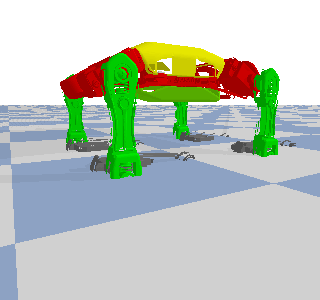

depth shape=(300, 320), dtype=float32, as values from 0.0 (near) to 1.0 (far)


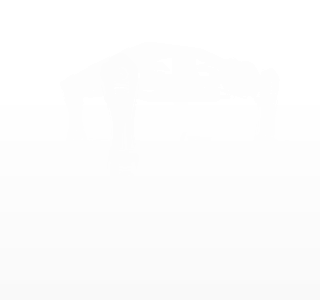

mask shape=(300, 320), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


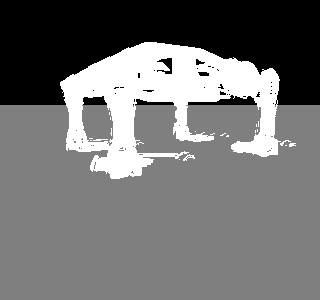

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display

width = 320
height = 300
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],
        distance=2,
        yaw=60,
        pitch=-10,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)
width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))
print(f"depth shape={depth.shape}, dtype={depth.dtype}, as values from 0.0 (near) to 1.0 (far)")
display(Image.fromarray((depth*255).astype('uint8')))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))

In [ ]:
# p.changeVisualShape(r2d2,-1,rgbaColor=[1,1,1,0])